<a href="https://colab.research.google.com/github/Piyushmittal2192/3d-structure-Clustering/blob/main/notebooks/3d_shape_clustering_with_centroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import random
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt

import itertools as it
import math

def get_centroid(shape):
  return np.mean(shape[0][:, 0]), np.mean(shape[0][:, 1]), np.mean(shape[0][:, 2])


def vec_distance(v1, v2):
    '''
    The distance between two vectors.
    '''
    diff = v2 - v1
    return math.sqrt(sum(diff * diff))


def get_centroid(shape):
  return np.mean(shape[0][:, 0]), np.mean(shape[0][:, 1]), np.mean(shape[0][:, 2])

def distances(s):
    '''
    Compute the distance array for a shape s.
    '''
    m = [np.mean(s[:, 0]), np.mean(s[:, 1]), np.mean(s[:, 2])]
    num_obs = s.shape[0]
    ds = [vec_distance(p1, p2) for p1, p2 in zip([m]*num_obs, s)]

    return np.array(ds)

def upsampling(shape, required):
  """
    # import random
    # letters = [['a', 'b'], ['b', 'c']]
    # print([random.choice(letters) for _ in range(3)] + letters)
  """
  new_shape = shape + [random.choice(shape) for _ in range(required)]
  # print(new_shape)
  # return np.array(new_shape) 
  return new_shape

def shape_mismatch(shapes):
  changed = False
  max_observations = np.array(shapes[0]).shape[0]
  # print(max_observations)
  for x in shapes:
    # print(np.array(x).shape[0])
    if max_observations != np.array(x).shape[0]:
      max_observations = np.array(x).shape[0]
      changed = True
      # print(changed)
    if changed:
      return True
  return False

def re_shape(shapes):

  max_observations = max([np.array(x).shape[0] for x in shapes])
  print(f"max observations in a 3d object: {max_observations}")
  req_obs = [max_observations - np.array(x).shape[0] for x in shapes]

  print(f"minimum of observations in a 3d object are: {max_observations - max(req_obs)}")

  for idx,i in enumerate(shapes):
    if req_obs[idx] > 0:
      shapes[idx] = upsampling(shapes[idx], req_obs[idx])
  
  return shapes

shapes = [[[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]],  
                   
                   
                  [[-1 + 10, -1+ 10, -1+ 10],
                  [1+ 10, -1+ 10, -1+ 10 ],
                  [1+ 10, 1+ 10, -1+ 10],
                  [-1+ 10, 1+ 10, -1+ 10],
                  [-1+ 10, -1+ 10, 1+ 10],
                  [1+ 10, -1+ 10, 1+ 10 ],
                  [1+ 10, 1+ 10, 1+ 10],
                  [-1+ 10, 1+ 10, 1+ 10]],

                  [[-1 + 15, -1+ 5, -1+ 5],
                  [1+ 15, -1+ 5, -1+ 5 ],
                  [1+ 15, 1+ 5, -1+ 5],
                  [-1+ 15, 1+ 5, -1+ 5],
                  [-1+ 30, -1+ 5, 1+ 5],
                  [1+ 30, -1+ 5, 1+ 5 ],
                  [1+ 30, 1+ 5, 1+ 5],
                  [-1+ 30, 1+ 5, 1+ 5]] 
                   
                   ]
# shapes
if shape_mismatch(shapes):
  print("Shape Mismatch detected")
  print("Upsampling to fix mismatch in shape")
  shapes = re_shape(shapes)
if isinstance(shapes, list):
  shapes = np.array(shapes)
print(f"overall shape of dataset {shapes.shape}")
# # create an array of inter-shape distances for each shape
darray = np.array([distances(s) for s in shapes])

# clustering = AgglomerativeClustering().fit(darray)
# print(f"clustering labels are {clustering.labels_}")


overall shape of dataset (3, 8, 3)


Text(0.5, 0, 'Z Label')

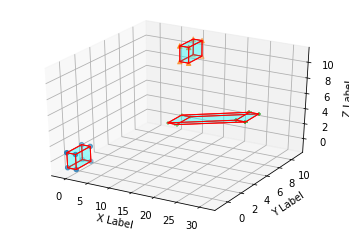

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
m = ['o', '^', '+']
for idx, i in enumerate(shapes):
  Z = i
    # xs = randrange(n, 23, 32)
    # ys = randrange(n, 0, 100)
    # zs = randrange(n, zlow, zhigh)
  ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2], marker=m[idx])
  verts = [[Z[0],Z[1],Z[2],Z[3]],
  [Z[4],Z[5],Z[6],Z[7]],
  [Z[0],Z[1],Z[5],Z[4]],
  [Z[2],Z[3],Z[7],Z[6]],
  [Z[1],Z[2],Z[6],Z[5]],
  [Z[4],Z[7],Z[3],Z[0]]]
  ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.20))


# # draw sphere
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = np.cos(u)*np.sin(v) + 5
# y = np.sin(u)*np.sin(v) + 5
# z = np.cos(v) + 5
# ax.plot_wireframe(x, y, z, color="b")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

([<matplotlib.axis.XTick at 0x7f1485180910>,
 <a list of 3 Text major ticklabel objects>)

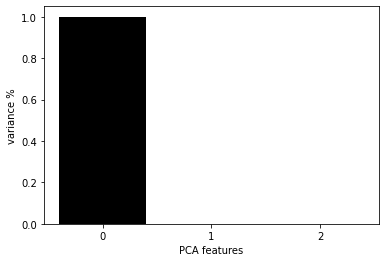

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(darray)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'PCA 2')

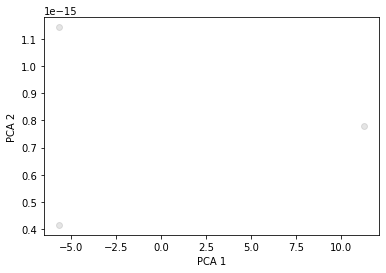

In [13]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


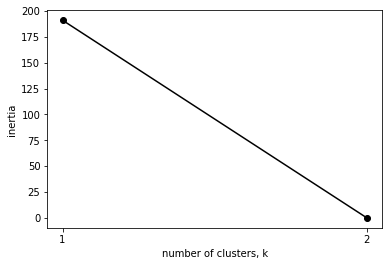

In [14]:
ks = range(1, 3)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [15]:
clustering = KMeans(n_clusters=2, random_state=0).fit(darray)
clustering.labels_

array([0, 0, 1], dtype=int32)

In [16]:
import collections 
res = collections.Counter(clustering.labels_)
res = {k:v for k,v in sorted(res.items(), key = lambda x: x[0], reverse = False)}
for key, value in res.items():
    print(f"Cluster {key + 1} has {value} structures")

Cluster 1 has 2 structures
Cluster 2 has 1 structures
